# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [31]:
df_descr = pd.read_csv("D:\\MyML\\lesson_02\\data\\otp_description.csv", sep='\t', encoding='utf8')

In [32]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [33]:
df_train = pd.read_csv("D:\\MyML\\lesson_02\\data\\otp_train.csv", sep='\t', encoding='utf8')

In [34]:
df_train.shape

(15223, 52)

In [35]:
df_test = pd.read_csv("D:\\MyML\\lesson_02\\data\\otp_test.csv", sep='\t', encoding='utf8')

In [36]:
df_test.shape

(14910, 52)

In [37]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [38]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [39]:
df = df_test.append(df_train).reset_index(drop=True)

In [40]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [41]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [42]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Неполное среднее', 'Ученая степень'}


MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Развлечения/Искусство', 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Страхование', 'Подбор персонала', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Логистика', 'Сборочные производства', 'Здравоохранение', 'Государственная служба', 'Недвижимость', 'СМИ/Реклама/PR-агенства', 'Другие сферы', 'Маркетинг', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Ресторанный бизнес/Общественное питание', 'Торговля', 'Банк/Финансы', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Информационные услуги', 'Транспорт', 'Сельское хозяйство', 'Управляющая компания', 'Туризм', 'Юридические услуги/нотариальные услуги', 'ЧОП/Детективная д-ть', 'Информационные технологии', 'Строительство'}


GEN_TITLE


In [43]:
df.head(2)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

#Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [44]:
df.isnull().head(2)
#Предлагаю заполнить все нулями. 


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [45]:
df.head(2)


,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [46]:
#obj_df = df.select_dtypes(include=['object']).copy()
#obj_df.head(5)
#obj_df["EDUCATION"].value_counts()
#obj_df["EDUCATION"] = obj_df["EDUCATION"].astype('category')
#obj_df["EDUCATION_cat"] = obj_df["EDUCATION"].cat.codes
#obj_df.drop("EDUCATION", axis=1)
#obj_df.head(5)
#Это первый вариант. Еще можно использовать replace. Это сэкономит вычислительные ресурсы

#Но для кода проще
#char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index

#for c in char_cols:
 #   df[c] = pd.factorize(df[c])[0]
#df.head(2)


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [47]:
def preproc_data(df_input):
    df_output = df_input.copy()    
    df_output.drop(['AGREEMENT_RK'], axis=1)
    #print(df_output.head(2))
    df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output=df_output.fillna(0)
    pd.get_dummies(df_output)
    return df_output

In [48]:
#df_preproc = df.pipe(preproc_data)
df_preproc=df.copy() 
#df_output = df_input.copy()    
df_preproc=df_preproc.drop(['AGREEMENT_RK'], axis=1)
df_preproc['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df_preproc['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df_preproc['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df_preproc['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df_preproc['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df_preproc=df_preproc.fillna(0)
df_preproc=pd.get_dummies(df_preproc)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_train'], axis=1).drop(['sample_test'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_train'], axis=1).drop(['sample_test'], axis=1)
df_train_preproc.head(2)
#df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
#df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,"LOAN_MAX_DLQ_AMT_988,85","LOAN_MAX_DLQ_AMT_989,15","LOAN_MAX_DLQ_AMT_989,39",LOAN_MAX_DLQ_AMT_990,"LOAN_MAX_DLQ_AMT_990,85","LOAN_MAX_DLQ_AMT_991,19","LOAN_MAX_DLQ_AMT_997,13","LOAN_MAX_DLQ_AMT_997,65","LOAN_MAX_DLQ_AMT_997,66","LOAN_MAX_DLQ_AMT_997,89"
14910,0,49,1,0,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14911,0,32,1,0,1,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [49]:
df_train_preproc_labels = df_train_preproc['TARGET']
df_train_preproc_data = df_train_preproc.drop(labels='TARGET', axis=1)
df_test_preproc_label=df_test_preproc['TARGET']
df_test_preproc_data = df_test_preproc.drop(labels='TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [50]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc_data, df_train_preproc_labels, test_size=0.3, random_state=42)
## Your Code Here


In [51]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

temp_score=0

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

max_max_depth = 15
print("Start researching DecisionTreeClassifier. Testing value of max_depth from 1 to {:.0f} ".format(max_max_depth))
max_depth=0

for i in range(1,15):
 tree = DecisionTreeClassifier(random_state=0, max_depth=i)
 tree.fit(X_train, y_train)
 score = tree.score(X_test, y_test)
 if (score > temp_score):
  temp_score = score
  max_depth = i
temp_score = 0
tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
tree.fit(df_train_preproc_data, df_train_preproc_labels)
print("Learning method : DecisionTreeClassifier. Max_depth= {:.1f}. Result% : {:.1f}".format(max_depth,tree.score(df_test_preproc_data, df_test_preproc_label)*100))



max_n_estimators =4
max_max_features = 4
max_depth = 4
n_estimators=0
max_features = 1
print("Start researching RandomForestClassifier. Testing value of max_n_estimators from 1 to {:.0f}, max_features from 1 to {:.0f}, max_depth={:.0f}".format(max_n_estimators,max_max_features, max_depth))

for i in range(0,max_n_estimators):
 for j in range(1,max_max_features):
  forest = RandomForestClassifier(n_estimators=1*(10**i),max_features=j, max_depth=max_depth, random_state=0)
  forest.fit(X_train, y_train)
  score = forest.score(X_test, y_test)
  if (score > temp_score):
   temp_score = score
   max_features = j
   n_estimators = i
temp_score = 0


forest = RandomForestClassifier(n_estimators=1*(10**n_estimators), max_features=max_features,max_depth=max_depth, random_state=0)
forest.fit(df_test_preproc_data, df_test_preproc_label)

print("Learning method : RandomForestClassifier.: n_estimators={:.0f}, max_features = {:.0f}, max_depth= {:.0f}. Result is: {:.2f}%".format(1*(10**n_estimators),max_features,max_depth,forest.score(df_test_preproc_data, df_test_preproc_label)*100))



max_max_iter=4
max_C=4
max_iter=0;
C=0
print("Start researching LogisticRegression. Testing value of max_iter from 1 to {:.0f}, C from 1 to {:.0f}, penalty=l1".format(1*(10**max_max_iter),1*(10**max_C)))
for i in range(0,max_max_iter):
 for j in range(0,max_C):
  logreg = LogisticRegression(max_iter =1*(10**i),C=1*(10**j), penalty="l1", random_state=0).fit(X_train, y_train)
  score = logreg.score(X_test, y_test)
  if (score > temp_score):
   temp_score = score
   max_iter = i
   C=j
temp_score = 0
#LogisticRegression Maximum
logreg = LogisticRegression(max_iter =1*(10**max_iter),C=1*(10**C), penalty="l1", random_state=0).fit(df_train_preproc_data, df_train_preproc_labels)
print("Learning method : LogisticRegression. Penalty=l1, max_iter = {:.0f}, C = {:.0f}. Result is  : {:.3f}%".format(1*(10**max_iter),1*(10**C),logreg.score(df_test_preproc_data, df_test_preproc_label)*100))


Start researching DecisionTreeClassifier. Testing value of max_depth from 1 to 15 
Learning method : DecisionTreeClassifier. Max_depth= 1.0. Result% : 88.3
Start researching RandomForestClassifier. Testing value of max_n_estimators from 1 to 4, max_features from 1 to 4, max_depth=4
Learning method : RandomForestClassifier.: n_estimators=1, max_features = 1, max_depth= 4. Result is: 88.28%
Start researching LogisticRegression. Testing value of max_iter from 1 to 10000, C from 1 to 10000, penalty=l1
Learning method : LogisticRegression. Penalty=l1, max_iter = 100, C = 1. Result is  : 87.988%


In [67]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
predtTree = tree.predict(df_test_preproc_data)
print("accuracy_score, precision_score, recall_score for Tree")
print(accuracy_score(df_test_preproc_label, predtTree))
print(precision_score(df_test_preproc_label, predtTree))
print(recall_score(df_test_preproc_label, predtTree))


print("accuracy_score, precision_score, recall_score for Forest")
predtForest = forest.predict(df_test_preproc_data)
print(accuracy_score(df_test_preproc_label, predtForest))
print(precision_score(df_test_preproc_label, predtForest))
print(recall_score(df_test_preproc_label, predtForest))

print("accuracy_score, precision_score, recall_score for LogReg")
predtLogreg = logreg.predict(df_test_preproc_data)
print(accuracy_score(df_test_preproc_label, predtLogreg))
print(precision_score(df_test_preproc_label, predtLogreg))
print(recall_score(df_test_preproc_label, predtLogreg))
## Your Code Here

accuracy_score, precision_score, recall_score for Tree
0.882629107981
0.0
0.0
accuracy_score, precision_score, recall_score for Forest


C:\Users\Legat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.882763246144
1.0
0.00114285714286
accuracy_score, precision_score, recall_score for LogReg
0.879879275654
0.341085271318
0.0251428571429


C:\Users\Legat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,1,'Recall comparision')

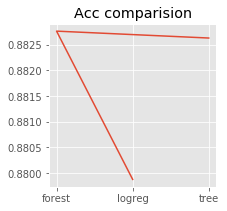

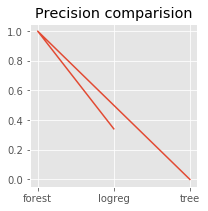

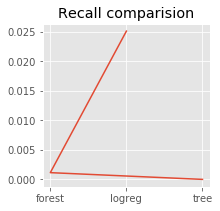

In [68]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
%matplotlib inline
labelsGraph = ['tree','forest','logreg']
accuracy=[accuracy_score(df_test_preproc_label, predtTree),accuracy_score(df_test_preproc_label, predtForest),accuracy_score(df_test_preproc_label, predtLogreg)]
plt.figure(figsize=(3, 3))
plt.plot(labelsGraph,accuracy)
plt.title('Acc comparision')

precision=[precision_score(df_test_preproc_label, predtTree),precision_score(df_test_preproc_label, predtForest),precision_score(df_test_preproc_label, predtLogreg)]
plt.figure(figsize=(3, 3))
plt.plot(labelsGraph,precision)
plt.title('Precision comparision')


recall=[recall_score(df_test_preproc_label, predtTree),recall_score(df_test_preproc_label, predtForest),recall_score(df_test_preproc_label, predtLogreg)]
plt.figure(figsize=(3, 3))
plt.plot(labelsGraph,recall)
plt.title('Recall comparision')
## Your Code Here

(-0.01, 1.01)

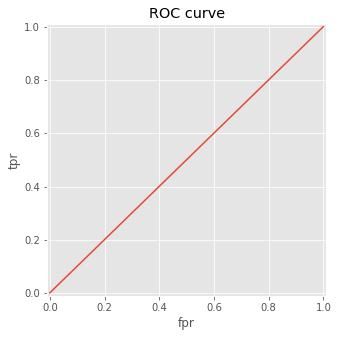

In [72]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve
fprTree, tprTree, thresholdsForest = roc_curve(df_test_preproc_label, predtForest)
fprForest, tprForest, thresholdsForest = roc_curve(df_test_preproc_label, predtForest)
fprLogReg, tprLogReg, thresholdsLogReg = roc_curve(df_test_preproc_label, predtLogreg)
plt.figure(figsize=(5, 5))
plt.plot(fprTree, tprTree)
plt.plot(fprForest, tprForest)
plt.plot(fprLogReg, tprLogReg)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
## Your Code Here


#Извините, я тут не понял что происходит. Явная лажа, не знаю почему

In [61]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
kfld = KFold(10,shuffle=False)
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели

cros_score = cross_val_score(tree, X_test, y_test, cv=kfld, scoring='roc_auc')
print("Значения правильности перекрестной проверки DecisionTreeClassifier: {}%".format(cros_score*100))
print("Средняя правильность перекрестной проверки DecisionTreeClassifier: {:.2f}%".format(cros_score.mean()*100))

cros_score = cross_val_score(forest, df_train_preproc_data, df_train_preproc_labels, cv=kfld, scoring='roc_auc')
print("Значения правильности перекрестной проверки RandomForestClassifier: {}%".format(cros_score*100))
print("Средняя правильность перекрестной проверки RandomForestClassifier: {:.2f}%".format(cros_score.mean()*100))

cros_score = cross_val_score(logreg, df_train_preproc_data, df_train_preproc_labels, cv=kfld, scoring='roc_auc')
print("Значения правильности перекрестной проверки DecisionTreeClassifier: {}%".format(cros_score*100))
print("Средняя правильность перекрестной проверки DecisionTreeClassifier: {:.2f}%".format(cros_score.mean()*100))
# И посчитать средний roc_auc

## Your Code Here

TypeError: 'KFold' object is not iterable

In [ ]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predictfinal = tree.predict_proba(df_test_preproc_data)
print(predictfinal)


## Your Code Here

In [88]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
from sklearn.metrics import roc_auc_score
#roc = roc_auc_score(df_test_preproc_data, predictfinal) Эта часть не работает!!!!!!! 
#Работает только так! 

roc = roc_auc_score(df_test_preproc_label, tree.predict(df_test_preproc_data))

print(roc)
## Your Code Here

0.5


### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)